<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP2/TP2_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')   #lo uso para cmabiar el background de las figuras porque uso dark mode
%matplotlib inline


from datetime import datetime

In [ ]:
df_casos = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')

df_casos['fecha'] = pd.to_datetime(df_casos['fecha'])

df_casos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


In [ ]:
df_camas = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')
df_camas['fecha'] = pd.to_datetime(df_camas['fecha'])

df_camas

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


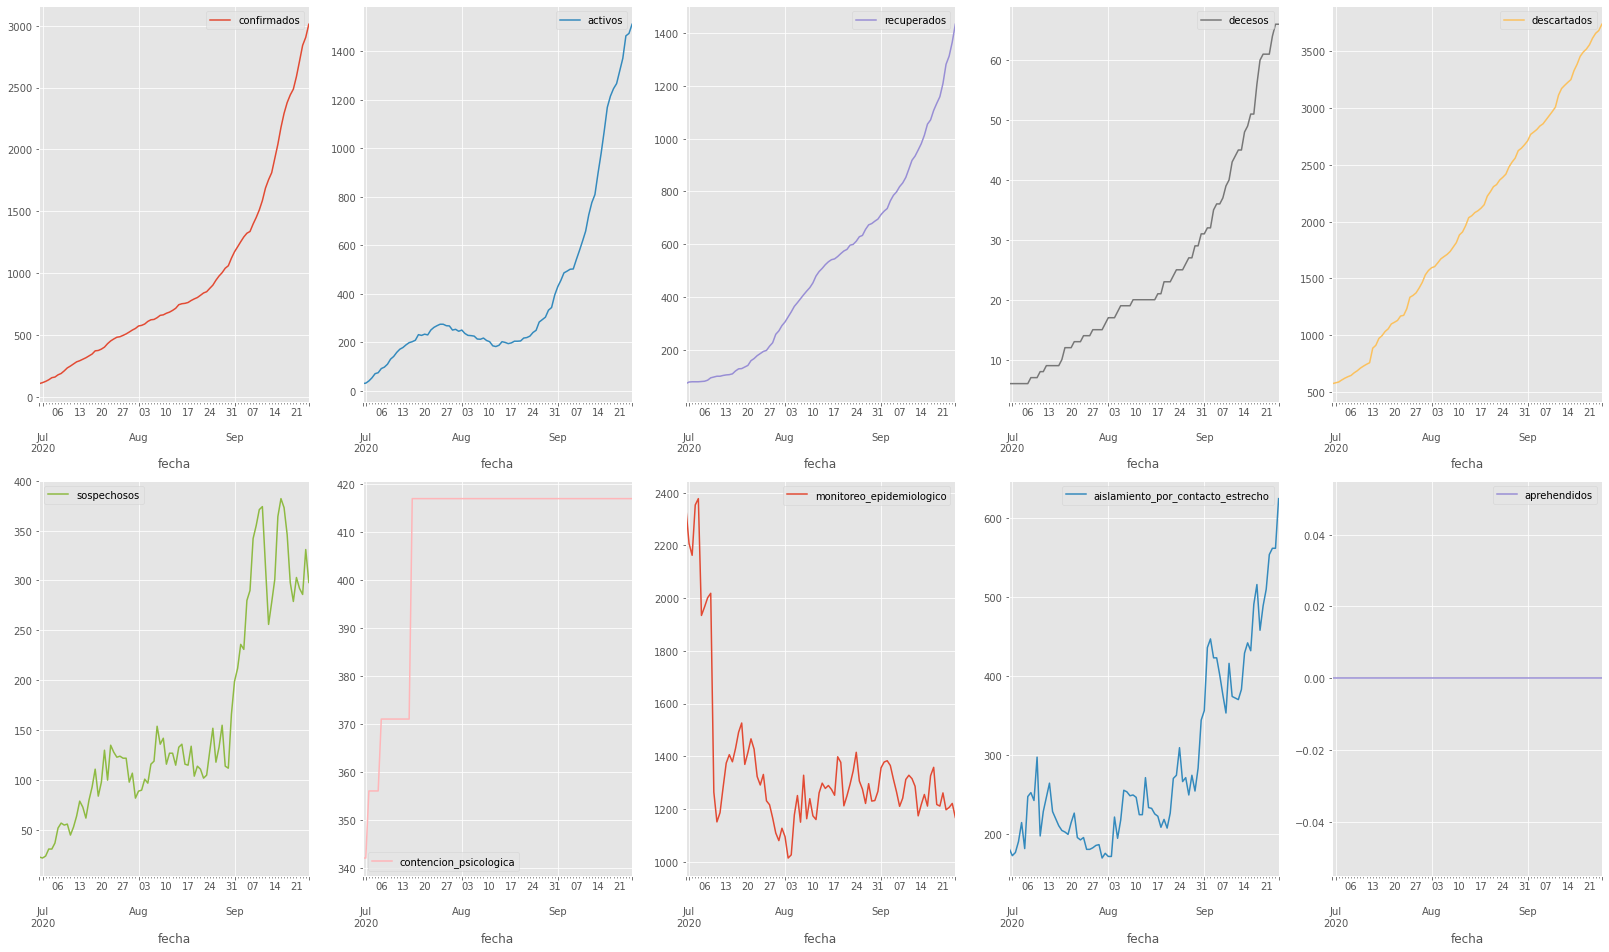

In [ ]:
style.use('ggplot') or plt.style.use('ggplot')  #Se debe utilizar dos veces para obtener fondo blanco y no fondo gris
df_casos.plot(x = 'fecha', subplots=True, layout=(2,5), figsize=(28, 16), sharex=False)
plt.show()

De los graficos anteriores podemos determinar que el "feature": aprehendidos tiene un comportamiento anormal y no aporta información util debido a que se mantiene en cero para todo tiempo.

La distribución de "contencion_psicologica" posee la particularidad de estancarse luego del 13 de Julio, por lo que indicaria que los puntos anteriores podrían ser outliers o deberse a alguna medida municipal.


In [ ]:
mask = [True if l == 0 else False for l in df_camas["total_camas_hospitales"]]

print(df_camas['total_camas_hospitales'][mask])

7     0
12    0
16    0
Name: total_camas_hospitales, dtype: int64


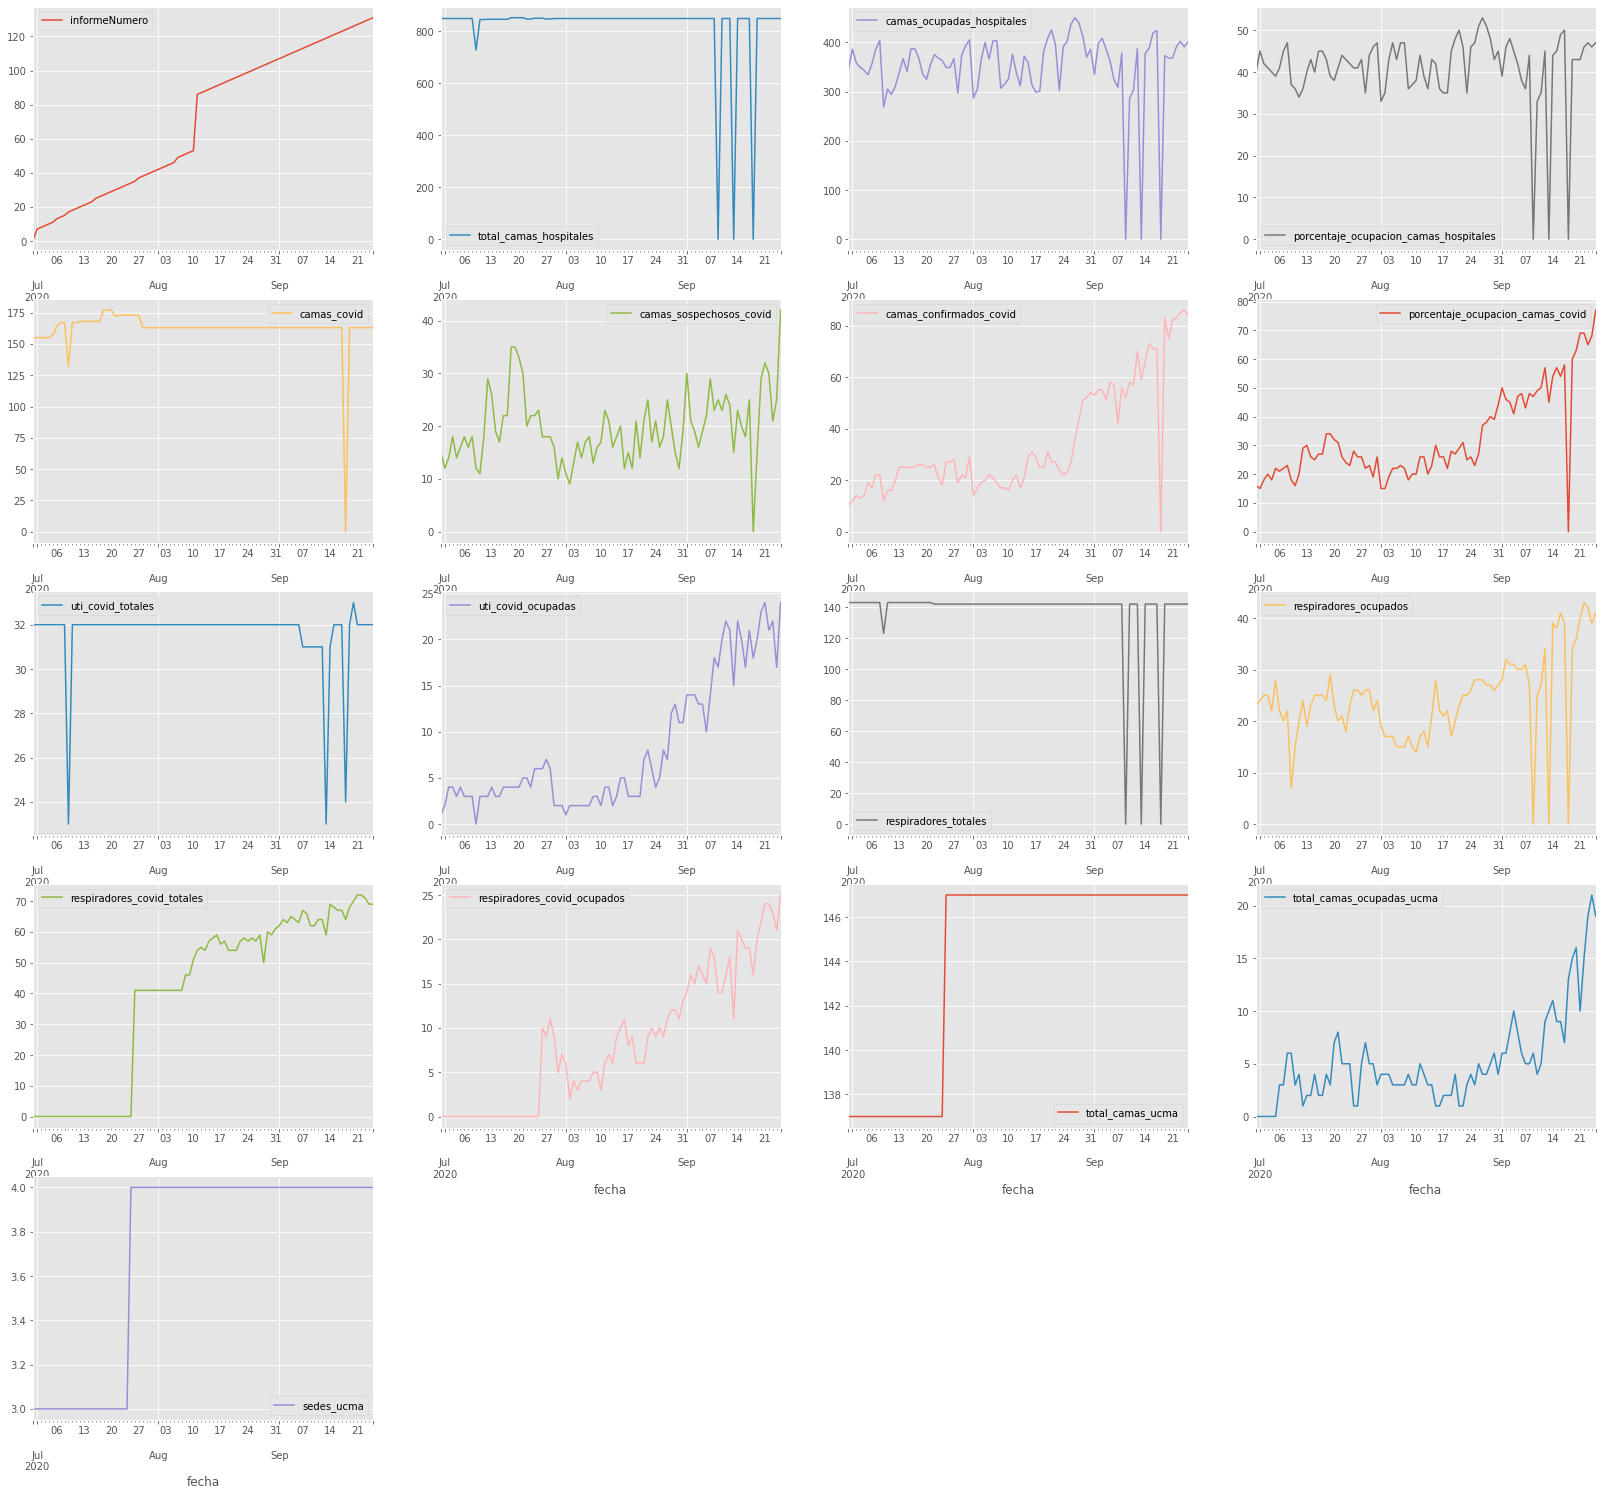

In [ ]:
style.use('ggplot') or plt.style.use('ggplot')  #Se debe utilizar dos veces para obtener fondo blanco y no fondo gris
df_camas.plot(x = 'fecha', subplots=True, layout=(-1,4), figsize=(28, 26), sharex=False)
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', -1)
mask = df_camas.notna()['observaciones']
df_camas[['fecha','observaciones']][mask]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,fecha,observaciones
7,2020-09-18,"Sin información del Hospital Municipal. \nPor falta de datos, sin información de los totales de camas y respiradores."
12,2020-09-13,"- El Hospital Municipal no brindó información de sectores Covid.\n- Por falta de datos informados por algunos hospitales, no se puede informar cantidades totales de camas ni de respiradores."
14,2020-09-11,Hospital Penna informó solo COVID
15,2020-09-10,"Sin información del total de camas y del total de respiradores, el Hospital Penna informó solo COVID."
16,2020-09-09,Sin información del total de camas y del total de respiradores.\nSin información del hospital HAM\nHospital Penna informó solo COVID.
54,2020-08-02,SIN INFORMACIÓN DEL ESPAÑOL
55,2020-08-01,"POR FALTA DE LUZ, EL HMALL NO PUDO INFORMAR OCUPACIÓN"
78,2020-07-09,"No se recibió informe de camas, camas UTI y respiradores del HMALL."


Se observa la prescencia de outliers en el "total_camas_hospitales",	"camas_ocupadas_hospitales",	"porcentaje_ocupacion_camas_hospitales",	"camas_covid",	"camas_sospechosos_covid",	"camas_confirmados_covid",	"porcentaje_ocupacion_camas_covid",	"uti_covid_totales",	"uti_covid_ocupadas",	"respiradores_totales",	"respiradores_ocupados",	"respiradores_covid_totales",	"respiradores_covid_ocupados"

Los cuales se deben a la falta de informacion por parte de un hospital como se detalla en las observaciones
